# Time Series tests and visualizations

## Generating Test Data and Visualization

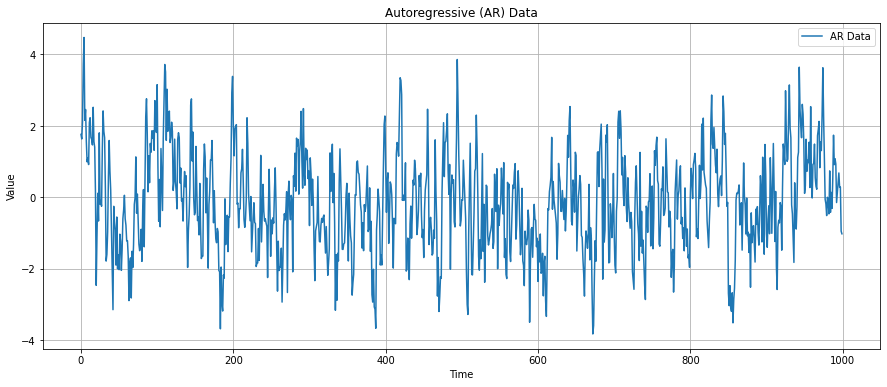

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
n = 1000  # Number of observations
phi = 0.7  # AR coefficient

# Generate autoregressive data
np.random.seed(0)
ar_data = [np.random.normal()]
for i in range(1, n):
    ar_data.append(phi * ar_data[-1] + np.random.normal())

# Plot the data
plt.figure(figsize=(15, 6))
plt.plot(ar_data, label='AR Data')
plt.title('Autoregressive (AR) Data')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

## Checking and Correcting for Assumptions

### Stationarity

To check for stationarity, we can use the Augmented Dickey-Fuller (ADF) test. If the p-value obtained from the test is less than a significance level (e.g., 0.05), we reject the null hypothesis of non-stationarity.

In [2]:
from statsmodels.tsa.stattools import adfuller

# ADF Test
adf_result = adfuller(ar_data)
print('ADF Statistic:', adf_result[0])
print('p-value:', adf_result[1])

ADF Statistic: -8.013981850615373
p-value: 2.1635229614637052e-12


From the P-value, we can determine that the data is stationary.

## Autocorrelation/Partial Autocorrelation Plots

An autocorrelation plot, often referred to as an ACF plot, illustrates the correlation between a time series and its lagged values at various lag intervals. This plot portrays correlation coefficients on the y-axis against lag intervals on the x-axis. The height of each point on the plot reflects the strength of correlation between the time series and its lagged values corresponding to that lag interval.

Statistically significant correlations are represented by points extending beyond the confidence intervals. These points indicate significant correlation between the time series and its lagged values at those specific lag intervals.

The autocorrelation typically diminishes as the lag interval increases, signifying that the impact of past observations on current observations weakens with longer time lags. Analyzing the rate of decay and the pattern of autocorrelation provides valuable insights into the underlying structure of the time series.

### Interpretation:

- An autocorrelation close to 1 at a particular lag suggests a strong positive correlation between the current observation and its lagged value at that lag.
- An autocorrelation close to -1 at a specific lag indicates a strong negative correlation between the current observation and its lagged value at that lag.
- An autocorrelation near 0 implies no significant correlation between the current observation and its lagged value at that lag.

Autocorrelation plots serve as a valuable tool for determining the order of autoregressive models (AR) by aiding in the identification of the appropriate lag order.

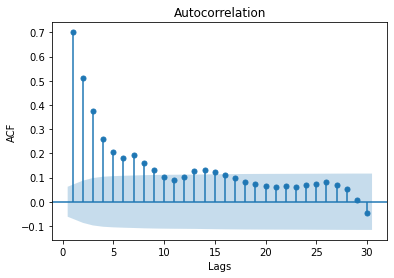

In [3]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(ar_data, lags=30, zero=False)
plt.xlabel('Lags')
plt.ylabel('ACF')
plt.show()

A Partial Autocorrelation Plot (PACF), reveals the correlation between a time series and its lagged values, isolating the direct relationship between a variable and its lagged observations by accounting for the influence of intervening lags.

Interpretation:

At lag 0, the partial autocorrelation is invariably 1, as it reflects the correlation of a variable with itself.
The partial autocorrelation at any lag indicates the correlation between the present observation and its lagged value at that specific lag, adjusting for the intervening lags.
Notable spikes in the PACF plot signify the presence of significant autocorrelation at the corresponding lag.
A widely used guideline is to determine the lag order until the partial autocorrelation values become statistically insignificant (falling within confidence intervals) or abruptly cut off.

Example Interpretation:

Suppose a PACF plot displays prominent spikes at lags 1, 2, and 3, with subsequent partial autocorrelations within the confidence intervals. In such a scenario, you could infer that the optimal lag order for your autoregressive model is 3. This conclusion suggests a substantial direct association between the current observation and its lagged values up to lag 3, after adjusting for the effects of intervening lags.


Text(0, 0.5, 'PACF')

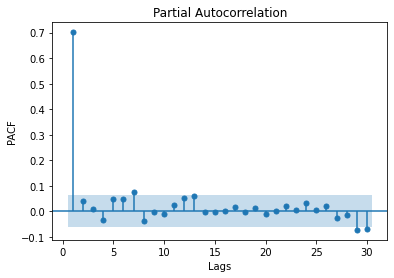

In [4]:
from statsmodels.graphics.tsaplots import plot_pacf

plot_pacf(ar_data, lags=30, zero=False)
plt.xlabel('Lags')
plt.ylabel('PACF')

##  Autocorrelation of Residuals

To check for autocorrelation of residuals, we can use the Durbin-Watson test. The test statistic ranges from 0 to 4, where a value around 2 indicates no autocorrelation. Values below 2.0 imply a positive autocorrelation and above 2.0 a negative autocorrelation.

In [5]:
from statsmodels.stats.stattools import durbin_watson

# Fit AR model and calculate residuals
from statsmodels.tsa.ar_model import AutoReg

model = AutoReg(ar_data, lags=2)
model_fit = model.fit()
residuals = model_fit.resid

# Durbin-Watson Test
dw_statistic = durbin_watson(residuals)
print('Durbin-Watson Statistic:', dw_statistic)

Durbin-Watson Statistic: 2.000523954136477


c:\Users\sahle\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(


## Model Validation

It should be noted that simple time series models often perform rather well compared to more complex models. Simple methods should be tried first before moving on to more complex models.

Simple models include:
- Take the mean of the seen values
- Using the last observation as a forecast (naive random walk)
- Using the last observation from the same season (seasonal naive random walk)
- Simple exponential smoothing
